# Recreating figure
# May 29, 2017

In [81]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
%matplotlib inline

In [2]:
mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
VAT26 = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_T_20150508-20150508.nc')

In [3]:
V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_V_20150508-20150508.nc')
U = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_U_20150508-20150508.nc')

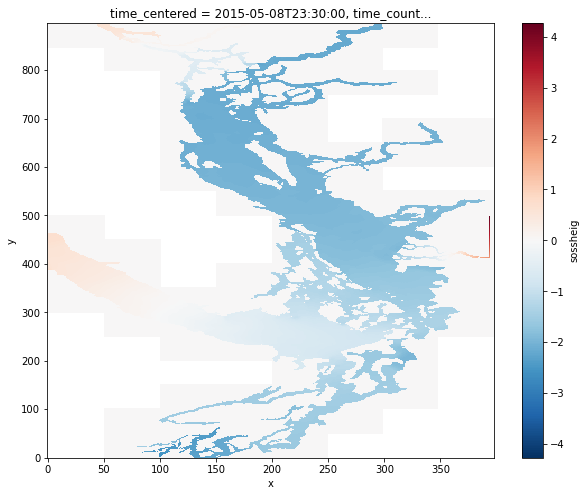

In [4]:
VAT26.sossheig.isel(time_counter=23).plot(figsize=((10,8)))

In [5]:
umask = mesh_mask.umask
vmask = mesh_mask.vmask
tmask= mesh_mask.tmask

In [6]:
restart = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_00516241_restart.nc')

In [30]:
fse3u = np.zeros((40,898,398))
for l in range(40):
    for m in range(898):
        for n in range(397):
            averaged = (restart.fse3t_n.isel(z=l,y=m,x=n) + restart.fse3t_n.isel(z=l,y=m,x=n+1)) /2
            fse3u[l,m,n] = averaged
fse3u

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ..., 
        [  1.00000115,   1.00000115,   1.00000115, ...,   0.        ,
           0.        ,   0.        ],
        [  1.00000115,   1.00000115,   1.00000115, ...,   0.        ,
           0.        ,   0.        ],
        [  1.00000115,   1.00000115,   1.00000115, ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,

In [79]:
hu_0 = mesh_mask.e3u_0 * umask
hu = hu_0.sum(dim='z').isel(t=0)

1.1363636363636362

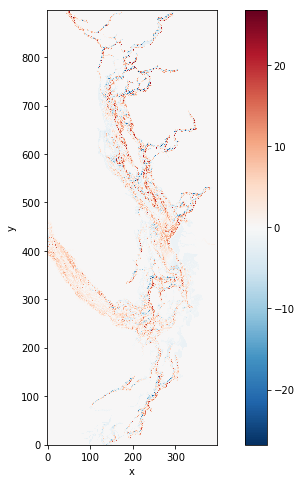

In [83]:
fig,ax=plt.subplots(1,1,figsize=((10,8)))
((umask.isel(t=0) * fse3u).sum(dim='z') - hu).plot(ax=ax)
viz_tools.set_aspect(ax)

In [80]:
hv_0 = mesh_mask.e3v_0 * vmask
hv = hv_0.sum(dim='z').isel(t=0)

In [77]:
fse3v = np.zeros((40,898,398))
for l in range(40):
    for m in range(398):
        for n in range(897):
            averaged = (restart.fse3t_n.isel(z=l,y=n,x=m) + restart.fse3t_n.isel(z=l,y=n+1,x=m)) /2
            fse3u[l,n,m] = averaged
fse3v

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

1.1363636363636362

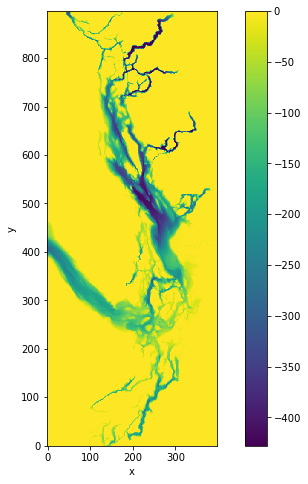

In [84]:
fig,ax=plt.subplots(1,1,figsize=((10,8)))
((fse3v * vmask.isel(t=0)).sum(dim='z') - hv).plot(ax=ax)
viz_tools.set_aspect(ax)

In [58]:
restart2 = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/try10/SalishSea_00514805_restart.nc')

# Using u

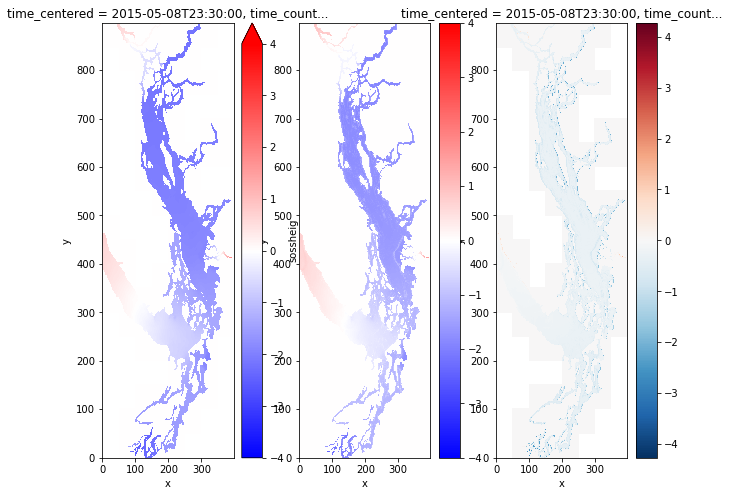

In [76]:
figs,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,8))
VAT26.sossheig.isel(time_counter=23).plot(ax=ax1,vmin = -4, vmax = 4, cmap = 'bwr')
((restart2.fse3u_n * umask).sum(dim='z').isel(t=0) - hu).plot(ax=ax2, vmin = -4, vmax = 4, cmap = 'bwr')
(VAT26.sossheig.isel(time_counter=23)-((restart2.fse3u_n * umask).sum(dim='z').isel(t=0) - hu)).plot(ax=ax3)

# Using v

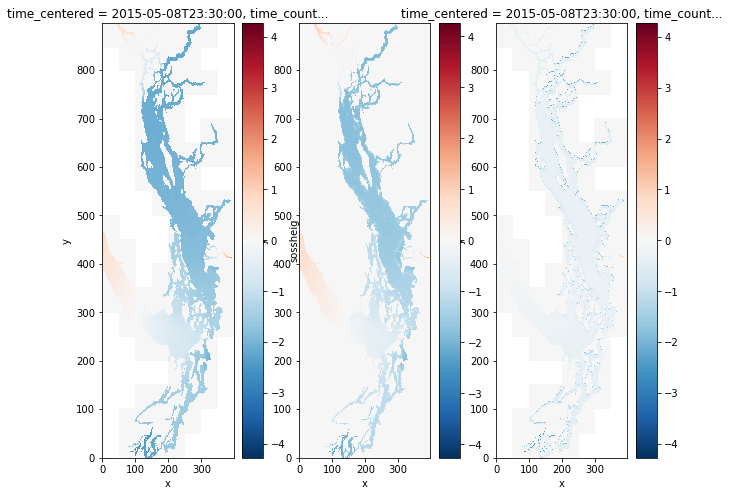

In [55]:
figs,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,8))
VAT26.sossheig.isel(time_counter=23).plot(ax=ax1)
((restart2.fse3v_n * vmask).sum(dim='z').isel(t=0) - hv).plot(ax=ax2)
(VAT26.sossheig.isel(time_counter=23) - ((restart2.fse3v_n * vmask).sum(dim='z').isel(t=0) - hv)).plot(ax=ax3)